In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import sklearn.model_selection
import seaborn as sns
import re
import joblib


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score

In [2]:
stress_df=pd.read_csv(r'C:\Users\nellu\Downloads\str_ss.csv')

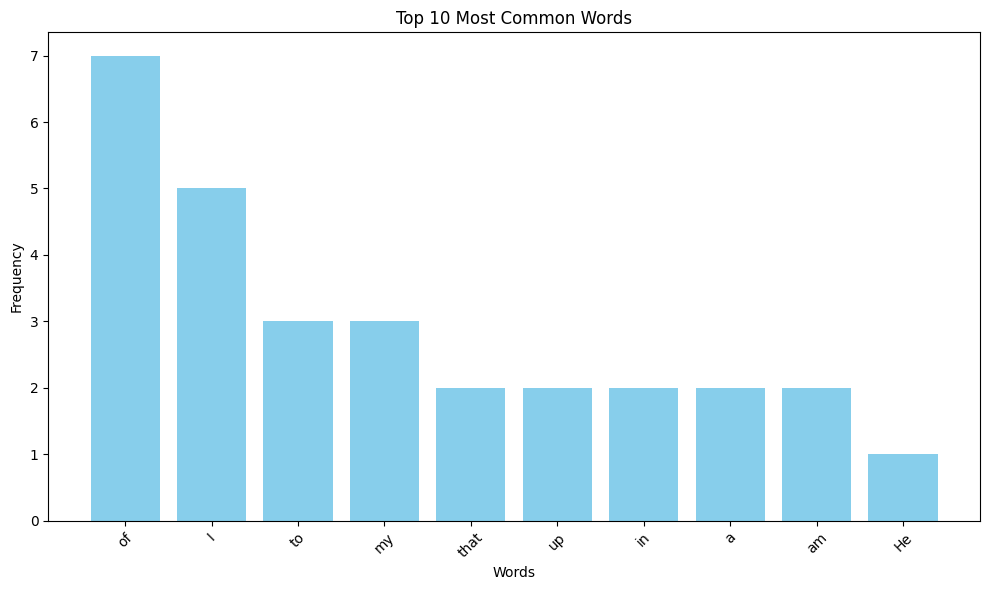

In [3]:
import matplotlib.pyplot as plt
from collections import Counter

def display_top_n_words(data, n):
    # Tokenize the data into words
    words = data.split()
    
    # Count the frequency of each word
    word_counts = Counter(words)
    
    # Get the top n most common words
    top_words = word_counts.most_common(n)
    
    # Extract words and their counts
    top_words, top_counts = zip(*top_words)
    
    # Plot the bar graph
    plt.figure(figsize=(10, 6))
    plt.bar(top_words, top_counts, color='skyblue')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(f'Top {n} Most Common Words')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example dataset
data = stress_df['text'].iloc[0]

# Display top 10 words
display_top_n_words(data, 10)


In [4]:
stress_df.head(10)


,text,label
0,"He said he had not felt that way before, sugge...",1
1,"Hey there r/assistance, Not sure if this is th...",0
2,My mom then hit me with the newspaper and it s...,1
3,"until i met my new boyfriend, he is amazing, h...",1
4,October is Domestic Violence Awareness Month a...,1
5,I think he doesn't want to put in the effort f...,1
6,It was a big company so luckily I didn't have ...,0
7,It cleared up and I was okay but. On Monday ...,1
8,I actually give an assistant half my emergency...,1
9,I just feel like the street life has fucked my...,1


In [5]:
stress_df.shape

(2838, 2)

In [6]:
stress_df.columns

Index(['text', 'label'], dtype='object')

In [7]:
stress_df.describe()

,label
count,2838.000000
mean,0.524313
std,0.499497
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [8]:
stress_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2838 non-null   object
 1   label   2838 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 44.5+ KB


In [9]:
stress_df1=stress_df.copy()

In [10]:
stress_df.isnull().sum()

text     0
label    0
dtype: int64

<Axes: xlabel='label'>

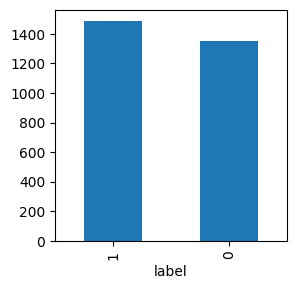

In [11]:
stress_df['label'].value_counts().plot(kind='bar',figsize=(3,3))

In [12]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')  # Download the required tokenizer data if not already downloaded

def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nellu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from collections import Counter

# Sample text from the dataset
#sample_text = "This is an example sentence for N-gram analysis. It includes punctuation and multiple words."
sample_text = stress_df['text'].iloc[0]

# Tokenize the sample text
tokens = word_tokenize(sample_text)

# Define the range of N for N-gram analysis
min_n = 1  # Minimum N-gram length
max_n = 3  # Maximum N-gram length

# Generate and count N-grams for each value of N
ngram_counts = {}
for n in range(min_n, max_n + 1):
    ngram_counts[n] = Counter(ngrams(tokens, n))

# Print the frequencies of N-grams for each value of N
for n, counts in ngram_counts.items():
    print(f"{n}-grams and their frequencies:")
    for ngram, count in counts.items():
        print(f"{ngram}: {count}")
    print()


1-grams and their frequencies:
('He',): 1
('said',): 1
('he',): 1
('had',): 1
('not',): 1
('felt',): 1
('that',): 2
('way',): 1
('before',): 1
(',',): 4
('suggeted',): 1
('I',): 6
('go',): 1
('rest',): 1
('and',): 1
('so',): 1
('..',): 3
('TRIGGER',): 1
('AHEAD',): 1
('IF',): 1
('YOUI',): 1
("'RE",): 1
('A',): 1
('HYPOCONDRIAC',): 1
('LIKE',): 1
('ME',): 1
(':',): 1
('i',): 1
('decide',): 1
('to',): 4
('look',): 1
('up',): 2
('``',): 3
('feelings',): 1
('of',): 7
('doom',): 3
("''",): 3
('in',): 2
('hopes',): 1
('maybe',): 1
('getting',): 1
('sucked',): 1
('into',): 1
('some',): 1
('rabbit',): 1
('hole',): 1
('ludicrous',): 1
('conspiracy',): 1
('a',): 2
('stupid',): 1
('are',): 1
('you',): 1
('psychic',): 1
('test',): 1
('or',): 1
('new',): 1
('age',): 1
('b.s.',): 1
('something',): 1
('could',): 1
('even',): 1
('laugh',): 1
('at',): 1
('down',): 1
('the',): 1
('road',): 1
('.',): 3
('No',): 1
('ended',): 1
('reading',): 1
('this',): 1
('sense',): 1
('can',): 1
('be',): 1
('indicative

In [14]:
import nltk 
import re 
nltk.download('stopwords') 
stemmer = nltk.SnowballStemmer("english") 
from nltk.corpus import stopwords 
import string 
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nellu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
words = stress_df['text'].iloc[0]
tokens = word_tokenize(words)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nellu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
print(tokens)

['He', 'said', 'he', 'had', 'not', 'felt', 'that', 'way', 'before', ',', 'suggeted', 'I', 'go', 'rest', 'and', 'so', '..', 'TRIGGER', 'AHEAD', 'IF', 'YOUI', "'RE", 'A', 'HYPOCONDRIAC', 'LIKE', 'ME', ':', 'i', 'decide', 'to', 'look', 'up', '``', 'feelings', 'of', 'doom', "''", 'in', 'hopes', 'of', 'maybe', 'getting', 'sucked', 'into', 'some', 'rabbit', 'hole', 'of', 'ludicrous', 'conspiracy', ',', 'a', 'stupid', '``', 'are', 'you', 'psychic', "''", 'test', 'or', 'new', 'age', 'b.s.', ',', 'something', 'I', 'could', 'even', 'laugh', 'at', 'down', 'the', 'road', '.', 'No', ',', 'I', 'ended', 'up', 'reading', 'that', 'this', 'sense', 'of', 'doom', 'can', 'be', 'indicative', 'of', 'various', 'health', 'ailments', ';', 'one', 'of', 'which', 'I', 'am', 'prone', 'to', '..', 'So', 'on', 'top', 'of', 'my', '``', 'doom', "''", 'to', 'my', 'gloom', '..', 'I', 'am', 'now', "f'n", 'worried', 'about', 'my', 'heart', '.', 'I', 'do', 'happen', 'to', 'have', 'a', 'physical', 'in', '48', 'hours', '.']


In [17]:
stress_df["label"] = stress_df["label"].map({0: "No Stress", 1: "Stress"})
stress_df = stress_df[["text", "label"]]
print(stress_df.head())

                                                text      label
0  He said he had not felt that way before, sugge...     Stress
1  Hey there r/assistance, Not sure if this is th...  No Stress
2  My mom then hit me with the newspaper and it s...     Stress
3  until i met my new boyfriend, he is amazing, h...     Stress
4  October is Domestic Violence Awareness Month a...     Stress


In [18]:
print('Before preprocessing data is :')
stress_df['text'].head()

Before preprocessing data is :


0    He said he had not felt that way before, sugge...
1    Hey there r/assistance, Not sure if this is th...
2    My mom then hit me with the newspaper and it s...
3    until i met my new boyfriend, he is amazing, h...
4    October is Domestic Violence Awareness Month a...
Name: text, dtype: object

In [19]:
import re
def clean(cleanText):
    cleanText = re.sub('http\S+\s*', ' ', cleanText)  # remove URLs
    cleanText = re.sub('RT|cc', ' ', cleanText)  # remove RT and cc
    cleanText = re.sub('#\S+', '', cleanText)  # remove hashtags
    cleanText = re.sub('@\S+', '  ', cleanText)  # remove mentions
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)  # remove punctuations
    cleanText = re.sub(r'[^\x00-\x7f]',r' ', cleanText)
    cleanText = re.sub('\s+', ' ', cleanText)  # remove extra whitespace
    return cleanText
stress_df['cleaned_text'] = stress_df.text.apply(lambda x: clean(x))
stress_df.head()

,text,label,cleaned_text
0,"He said he had not felt that way before, sugge...",Stress,He said he had not felt that way before sugget...
1,"Hey there r/assistance, Not sure if this is th...",No Stress,Hey there r assistance Not sure if this is the...
2,My mom then hit me with the newspaper and it s...,Stress,My mom then hit me with the newspaper and it s...
3,"until i met my new boyfriend, he is amazing, h...",Stress,until i met my new boyfriend he is amazing he ...
4,October is Domestic Violence Awareness Month a...,Stress,October is Domestic Violence Awareness Month a...


In [20]:
print('After preprocessing  data is :')
stress_df['cleaned_text'].head()

After preprocessing  data is :


0    He said he had not felt that way before sugget...
1    Hey there r assistance Not sure if this is the...
2    My mom then hit me with the newspaper and it s...
3    until i met my new boyfriend he is amazing he ...
4    October is Domestic Violence Awareness Month a...
Name: cleaned_text, dtype: object

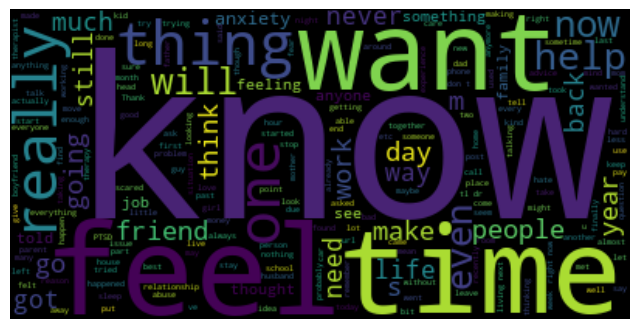

In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in stress_df.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
plt.figure( figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [22]:
stress_df.to_csv('cleaned_dataset.csv', index=False) 

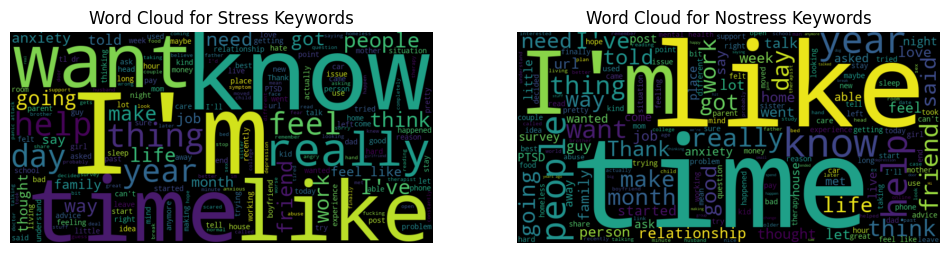

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import pandas as pd

df = pd.read_csv('cleaned_dataset.csv')

# Assuming you have your data in a DataFrame named df
stress_data = df[(df['label'] == 'Stress') | (df['label'] == 'No Stress')]['text']
nostress_data = df[(df['label'] == 'No Stress') & ~(df['label'] == 'Stress')]['text']

# Combine the text data into strings
stress_text = ' '.join(stress_data)
nostress_text = ' '.join(nostress_data)

# Create stopwords list including NLTK and scikit-learn stopwords
stopwords_combined = set(stopwords.words('english') + list(ENGLISH_STOP_WORDS))

# Create WordCloud objects for stress and nostress
stress_wordcloud = WordCloud(stopwords=stopwords_combined, background_color='black', width=800, height=400).generate(stress_text)
nostress_wordcloud = WordCloud(stopwords=stopwords_combined, background_color='black', width=800, height=400).generate(nostress_text)

# Plot the WordClouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(stress_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Stress Keywords')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(nostress_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Nostress Keywords')
plt.axis('off')

plt.show()

In [24]:
df=pd.read_csv('cleaned_dataset.csv',encoding="ISO-8859-1")
df.head()

,text,label,cleaned_text
0,"He said he had not felt that way before, sugge...",Stress,He said he had not felt that way before sugget...
1,"Hey there r/assistance, Not sure if this is th...",No Stress,Hey there r assistance Not sure if this is the...
2,My mom then hit me with the newspaper and it s...,Stress,My mom then hit me with the newspaper and it s...
3,"until i met my new boyfriend, he is amazing, h...",Stress,until i met my new boyfriend he is amazing he ...
4,October is Domestic Violence Awareness Month a...,Stress,October is Domestic Violence Awareness Month a...


In [25]:
df=df[['label','cleaned_text']]
df.head()

,label,cleaned_text
0,Stress,He said he had not felt that way before sugget...
1,No Stress,Hey there r assistance Not sure if this is the...
2,Stress,My mom then hit me with the newspaper and it s...
3,Stress,until i met my new boyfriend he is amazing he ...
4,Stress,October is Domestic Violence Awareness Month a...


In [26]:
df.describe()

,label,cleaned_text
count,2838,2834
unique,2,2818
top,Stress,Hello You are invited to complete a survey for...
freq,1488,4


In [27]:
# Splitting the data into features (X) and target variable (y)
X = df['cleaned_text']
y = df['label']

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (2270,) (2270,)
Testing set shape: (568,) (568,)


In [28]:
X_train = X_train.fillna('')
X_test = X_test.fillna('')

In [29]:
tfidf_vectorizer = TfidfVectorizer()  # You can adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [30]:
from sklearn.naive_bayes import BernoulliNB
nb_classifier = BernoulliNB()
nb_classifier.fit(X_train_tfidf, y_train)

BernoulliNB()

In [31]:
from sklearn.metrics import classification_report
predictions = nb_classifier.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Get classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.7623239436619719
Classification Report:
              precision    recall  f1-score   support

   No Stress       0.79      0.67      0.72       263
      Stress       0.75      0.84      0.79       305

    accuracy                           0.76       568
   macro avg       0.77      0.76      0.76       568
weighted avg       0.76      0.76      0.76       568



In [32]:
from sklearn.ensemble import RandomForestClassifier
raf_classifier = RandomForestClassifier()
raf_classifier.fit(X_train_tfidf, y_train)
from sklearn.metrics import classification_report
predictions = raf_classifier.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Get classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.7147887323943662
Classification Report:
              precision    recall  f1-score   support

   No Stress       0.74      0.59      0.66       263
      Stress       0.70      0.83      0.76       305

    accuracy                           0.71       568
   macro avg       0.72      0.71      0.71       568
weighted avg       0.72      0.71      0.71       568



In [33]:
from sklearn.tree import DecisionTreeClassifier
dec_classifier = DecisionTreeClassifier()
dec_classifier.fit(X_train_tfidf, y_train)
from sklearn.metrics import classification_report
predictions = dec_classifier.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Get classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.5862676056338029
Classification Report:
              precision    recall  f1-score   support

   No Stress       0.55      0.55      0.55       263
      Stress       0.61      0.62      0.62       305

    accuracy                           0.59       568
   macro avg       0.58      0.58      0.58       568
weighted avg       0.59      0.59      0.59       568



In [34]:
from sklearn.neighbors import KNeighborsClassifier
kn_classifier=KNeighborsClassifier()
kn_classifier.fit(X_train_tfidf, y_train)
from sklearn.metrics import classification_report
predictions = kn_classifier.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Get classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.602112676056338
Classification Report:
              precision    recall  f1-score   support

   No Stress       0.55      0.76      0.64       263
      Stress       0.69      0.47      0.56       305

    accuracy                           0.60       568
   macro avg       0.62      0.61      0.60       568
weighted avg       0.63      0.60      0.59       568



In [35]:
from sklearn.svm import SVC
svc_classifier=SVC()
svc_classifier.fit(X_train_tfidf, y_train)
from sklearn.metrics import classification_report
predictions = svc_classifier.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Get classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.7323943661971831
Classification Report:
              precision    recall  f1-score   support

   No Stress       0.72      0.69      0.70       263
      Stress       0.74      0.77      0.76       305

    accuracy                           0.73       568
   macro avg       0.73      0.73      0.73       568
weighted avg       0.73      0.73      0.73       568



In [36]:
from sklearn.linear_model import LogisticRegression
lgr_classifier=LogisticRegression()
lgr_classifier.fit(X_train_tfidf, y_train)
from sklearn.metrics import classification_report
predictions = lgr_classifier.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Get classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.7394366197183099
Classification Report:
              precision    recall  f1-score   support

   No Stress       0.73      0.69      0.71       263
      Stress       0.74      0.78      0.76       305

    accuracy                           0.74       568
   macro avg       0.74      0.74      0.74       568
weighted avg       0.74      0.74      0.74       568



In [37]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification

# Create dataset
Xx, yy = make_classification(n_samples=1000, n_features=20, random_state=42)

# Define classifiers
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Bernoulli Naive Bayes": BernoulliNB(),
    "SVM": SVC(),
    "KNeighbors":KNeighborsClassifier()

}

# Define k-fold cross-validation
kfold = KFold(n_splits=4, shuffle=True, random_state=42)

# Initialize list to store results
results = []

# Perform k-fold cross-validation for each classifier
for model_name, classifier in classifiers.items():
    accuracy_scores = cross_val_score(classifier, Xx, yy, cv=kfold, scoring='accuracy')
    precision_scores = cross_val_score(classifier, Xx, yy, cv=kfold, scoring='precision_macro')
    recall_scores = cross_val_score(classifier, Xx, yy, cv=kfold, scoring='recall_macro')
    f1_scores = cross_val_score(classifier, Xx, yy, cv=kfold, scoring='f1_macro')
    
    # Calculate mean scores
    accuracy_mean = accuracy_scores.mean()
    precision_mean = precision_scores.mean()
    recall_mean = recall_scores.mean()
    f1_mean = f1_scores.mean()
    
    # Append results to list
    results.append([model_name, accuracy_mean, precision_mean, recall_mean, f1_mean])

# Create DataFrame from results list
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])

# Print results
print(results_df)


                   Model  Accuracy  Precision    Recall  F1 Score
0          Decision Tree     0.855   0.851630  0.845240  0.841484
1    Logistic Regression     0.867   0.867145  0.868170  0.866761
2          Random Forest     0.895   0.884344  0.890657  0.893687
3  Bernoulli Naive Bayes     0.834   0.838540  0.835781  0.833367
4                    SVM     0.858   0.858086  0.858721  0.857646
5             KNeighbors     0.826   0.827910  0.827309  0.825521


In [38]:
results_df.head()

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.855,0.851630,0.845240,0.841484
1,Logistic Regression,0.867,0.867145,0.868170,0.866761
2,Random Forest,0.895,0.884344,0.890657,0.893687
3,Bernoulli Naive Bayes,0.834,0.838540,0.835781,0.833367
4,SVM,0.858,0.858086,0.858721,0.857646


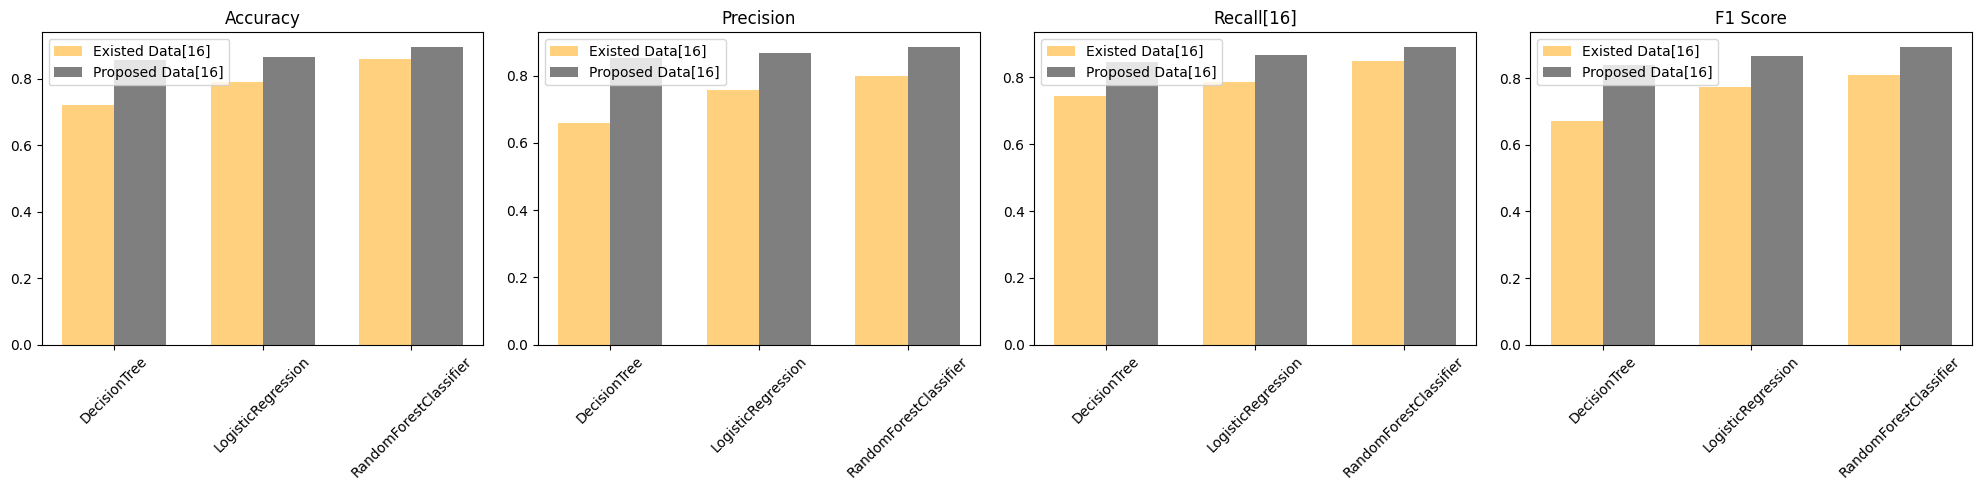

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data before
data_before = {
    'Model': ['DecisionTree', 'LogisticRegression', 'RandomForestClassifier'],
    'Accuracy': [0.7204, 0.7899, 0.860],
    'Precision': [0.6582, 0.7569, 0.7995],
    'Recall': [0.7436, 0.7878, 0.8486],
    'F1_Score': [0.6728, 0.7745, 0.8091]
}

# Create DataFrame from data_before
data_before_df = pd.DataFrame(data_before)

# Assuming you already have the DataFrame results_df

# Filter data_after_df to only include Decision Tree, Logistic Regression, and Random Forest
data_after_df_filtered = results_df[results_df['Model'].isin(['Decision Tree', 'Logistic Regression', 'Random Forest'])]

# Set the figure size
plt.figure(figsize=(20, 5))

# Define colors
colors_before = 'orange'
colors_after = 'black'

# Plot Accuracy
plt.subplot(1, 4, 1)
bar_width = 0.35
models = np.arange(len(data_before_df['Model']))

plt.bar(models - bar_width/2, data_before_df['Accuracy'], bar_width, color=colors_before, alpha=0.5, label='Existed Data[16]')
plt.bar(models + bar_width/2, data_after_df_filtered['Accuracy'], bar_width, color=colors_after, alpha=0.5, label='Proposed Data[16]')
plt.title('Accuracy')
plt.xticks(models, data_before_df['Model'], rotation=45)
plt.legend()

# Plot Precision
plt.subplot(1, 4, 2)
plt.bar(models - bar_width/2, data_before_df['Precision'], bar_width, color=colors_before, alpha=0.5, label='Existed Data[16]')
plt.bar(models + bar_width/2, data_after_df_filtered['Precision'], bar_width, color=colors_after, alpha=0.5, label='Proposed Data[16]')
plt.title('Precision')
plt.xticks(models, data_before_df['Model'], rotation=45)
plt.legend()

# Plot Recall
plt.subplot(1, 4, 3)
plt.bar(models - bar_width/2, data_before_df['Recall'], bar_width, color=colors_before, alpha=0.5, label='Existed Data[16]')
plt.bar(models + bar_width/2, data_after_df_filtered['Recall'], bar_width, color=colors_after, alpha=0.5, label='Proposed Data[16]')
plt.title('Recall[16]')
plt.xticks(models, data_before_df['Model'], rotation=45)
plt.legend()

# Plot F1 Score
plt.subplot(1, 4, 4)
plt.bar(models - bar_width/2, data_before_df['F1_Score'], bar_width, color=colors_before, alpha=0.5, label='Existed Data[16]')
plt.bar(models + bar_width/2, data_after_df_filtered['F1 Score'], bar_width, color=colors_after, alpha=0.5, label='Proposed Data[16]')
plt.title('F1 Score')
plt.xticks(models, data_before_df['Model'], rotation=45)
plt.legend()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [40]:
%pip install flask-ngrok

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\nellu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [41]:
import joblib
# Creating a pickle file for the CountVectorizer
joblib.dump(tfidf_vectorizer, open('tfidf_vectorizer.joblib', 'wb'))

In [42]:
import joblib
# Creating a pickle file for the Multinomial Naive Bayes model
filename = 'raf_classifier.joblib'
joblib.dump(raf_classifier, open(filename, 'wb'))